# Introduction

The data set refers to clients of a wholesale distributor. It includes the annual spending on different product categories.

Attribute Information:

1) FRESH: annual spending on fresh products.

2) MILK: annual spendingon milk products.

3) GROCERY: annual spending on grocery products.

4) FROZEN: annual spending on frozen products.

5) DETERGENTS: annual spending on detergents products.

6) DELICATESSEN: annual spending on and delicatessen products.

7) COSMETIC: annual spending on cosmetic products.

8) CLOTHING: annual spending on clothing products.

9) STATIONARY: annual spending on stationary products.

10) CHANNEL: customers Channel - Hotel or Retail channel.

11) REGION: customers Region - KA,TN,and KL.

12)LOYAL: customer loyalty - yes or no

13)COUNTRY: customer country

14)DISCOUNTS: Discount value

### Importing libraries to understand and manipulate data


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

#plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
#%matplotlib inline

#for clustering
from sklearn.cluster import KMeans

### Importing Data

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [0]:
import io
customer_df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
# Dataset is now stored in a Pandas Dataframe

In [8]:
customer_df.info() # for meta data information
#customer_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
type(customer_df)

pandas.core.frame.DataFrame

In [0]:
customer_df[['Channel','Region']] = customer_df[['Channel','Region']].astype('object')

In [0]:
#customer_df.get_dtype_counts()
customer_df.dtypes

## **Exploratory Data Analysis**

In [13]:
print("Descriptive statistics for the data")
customer_df.describe()

Descriptive statistics for the data


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
#median is more reliable central tendency as compare to mean
#(1+2+2+2+3)/5 #18, -10
#np.median([1,2,2,18])
#median=1,2,2,2,x is 2

2.0

**Categorical variables**

In [15]:
print(customer_df['Gender'].value_counts())


Female    112
Male       88
Name: Gender, dtype: int64


**Copying the data into another dataframe**

In [0]:
customer_copy=customer_df.copy()

In [0]:
#customer_copy['Cosmetic'].plot.hist(bins = 20)
customer_copy['Spending Score'].plot.hist(bins = 20)
plt.show()

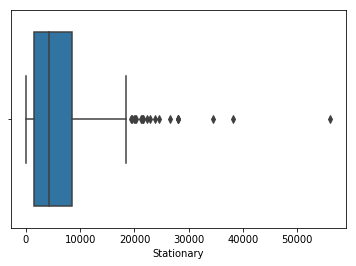

In [0]:
sns.boxplot(customer_copy['Stationary'])

In [0]:
#customer_copy['Channel'] = customer_copy['Channel'].map({1:'Hotel', 2:'Retail'})
customer_copy['Channel'].replace([1,2],['Hotel','Retail'],inplace=True)

In [0]:
customer_copy['Region'].replace([1,2,3],['KA','TN','KL'],inplace=True)

In [19]:
customer_copy.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Missing Values 

In [20]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Stationary -**

In [0]:
cust_withoutId = customer_copy.drop(['CustomerID'], axis=1)

In [27]:
cust_withoutId.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [31]:
cust_withoutId['Gender'].replace(['Male','Female'],[1,2],inplace=True)
cust_withoutId.head()#copying the variable so that we can compare the variables after changes

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [0]:
Stationary_copy.fillna(0,inplace=True)

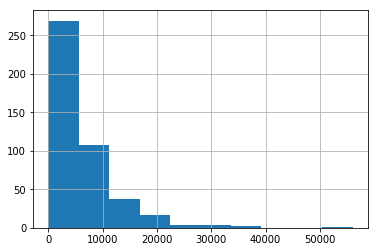

In [0]:
Stationary_copy.hist()

In [0]:
Stationary_copy.describe()

*For trying later-*

In [0]:
Stationary_copy.median()
Stationary_copy.fillna(Stationary_copy.median(),inplace=True)

In [0]:
print(customer_copy['Stationary'].describe())
print(Stationary_copy.describe())

In [0]:
Stationary_copy.hist(bins = 20)
plt.show()

**Cosmetic-**

In [0]:
customer_copy['Cosmetic '].isnull().sum()

In [0]:
customer_copy['Cosmetic '].describe()

In [0]:
customer_copy['Cosmetic '].hist()

In [0]:
cosmetic_copy=customer_copy['Cosmetic '].copy()
cosmetic_copy.fillna(0,inplace=True)
#customer_copy.columns

In [0]:
cosmetic_copy.isnull().sum()

In [0]:
cosmetic_copy.describe()

In [0]:
cosmetic_copy.hist()

### Categorical Data

In [0]:
#customer_copy['Loyalty'].value_counts()
customer_copy['Loyalty'].isnull().sum()

411

## Bivariate Analysis

In [23]:
customer_copy.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Correlation Heat map of the data


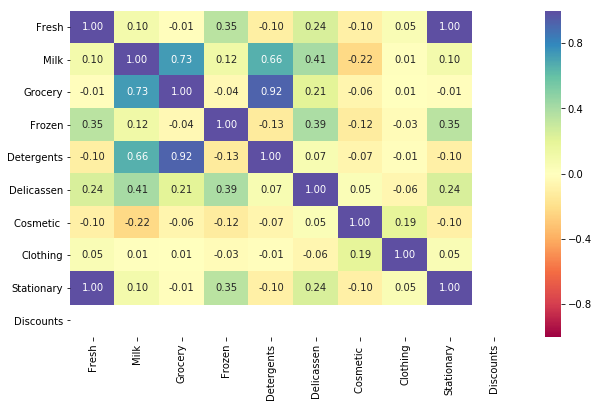

In [0]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(customer_copy.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

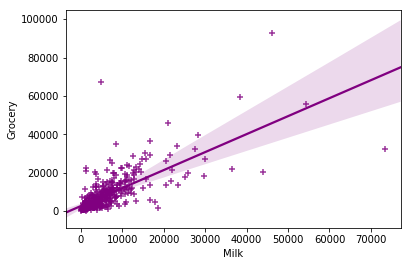

In [0]:
sns.regplot('Milk','Grocery',data=customer_copy,color="purple",marker="+")
#customer_copy.plot.scatter('Milk','Grocery',s=10,c="red")
plt.show()

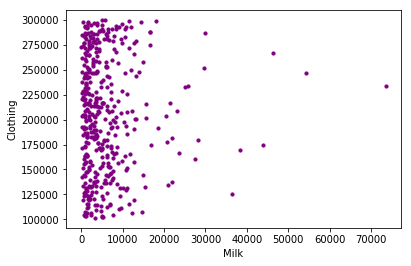

In [0]:
customer_copy.plot.scatter('Milk','Clothing',s=10,c="purple")
plt.show()

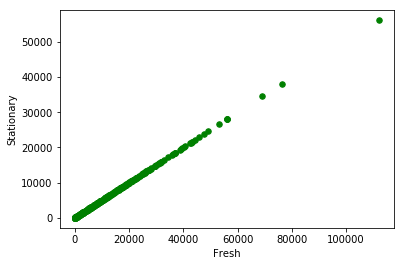

In [0]:
customer_copy.plot.scatter('Fresh','Stationary',s=30,c="green")
plt.show()

In [0]:
customer_copy.plot.scatter('Milk','Cosmetic ',s=30,c="green")
plt.show()

In [0]:
def categorical_multi(i,j):
    pd.crosstab(customer_copy[i],customer_copy[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(customer_copy[i],customer_copy[j]))

categorical_multi(i='Channel',j='Region') 

# K Means 




**Preparing data for clustering**

In [0]:
Numeric_data = cust_withoutId[['Annual Income (k$)','Spending Score (1-100)']]

In [36]:
Numeric_data.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [0]:
Numeric_data['Stationary'].fillna(Numeric_data['Stationary'].median(),inplace=True)

Scaling the data

In [37]:
#This estimator scales and transform the data into zero to one range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Numeric_data)
scaled_data = pd.DataFrame(scaled_data,columns=Numeric_data.columns)
scaled_data.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


Finding Number of clusters

In [0]:

X1 = scaled_data[['Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

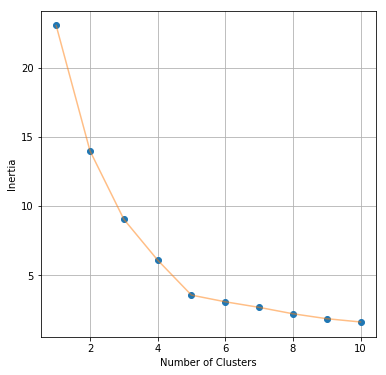

In [39]:
plt.figure(1 , figsize = (6 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [40]:
#from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,  tol=0.0001,  random_state= 111  , algorithm='elkan')
model.fit(scaled_data)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

In [41]:
clusters_data = customer_df.copy()
clusters_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
clusters_data['clusters']=model.predict(scaled_data)
clusters_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


In [43]:
#cluster profiles
clust_prof = clusters_data.groupby(['clusters'],as_index=False).mean()
clust_prof

,clusters,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0,86.320988,42.716049,55.296296,49.518519
1,1,164.371429,41.114286,88.200000,17.114286
2,2,23.000000,45.217391,26.304348,20.913043
3,3,162.000000,32.692308,86.538462,82.128205
4,4,23.090909,25.272727,25.727273,79.363636


Understanding the Output

In [44]:
clusters_data['clusters'].value_counts()

0    81
3    39
1    35
2    23
4    22
Name: clusters, dtype: int64

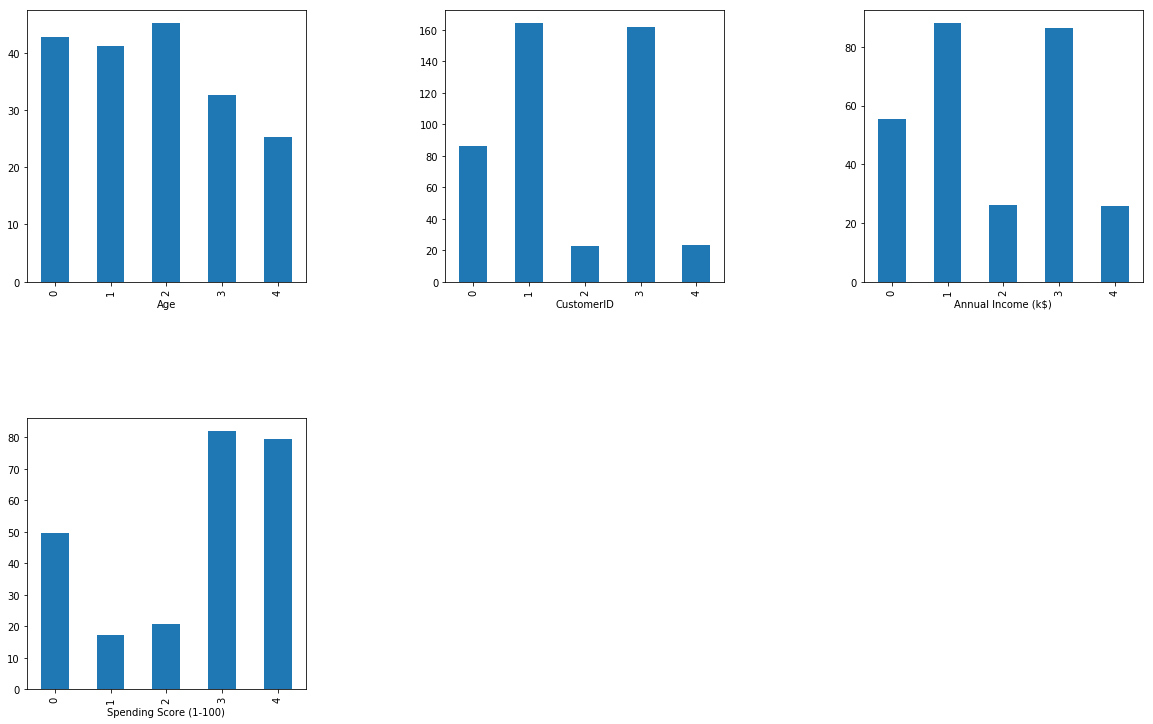

In [46]:
plt.figure(1 , figsize = (20,20))
n = 0 
for x in ['Age', 'CustomerID', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(3,3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    clusters_data[x].groupby(clusters_data['clusters']).mean().plot(kind='bar')
    plt.xlabel(x)
       
    
plt.show()

Z score tells us how far is a cluster mean value from its population mean. These scores have distribution with mean 0 and std. dev 1.

In [0]:
#Population mean of all the columns
clust_mean=clusters_data[['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']].mean(axis=0)
print('\033[1m'+"Population average of variables")
print('\033[0m')
print(clust_mean)

#printing bolds and colors in terminal
#http://jafrog.com/2013/11/23/colors-in-terminal.html 

NameError: ignored

In [0]:
#Population mean of all the columns
clust_std=clusters_data[['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']].std(axis=0)
print('\033[1m'+"Population Std. Deviation of variables")
print('\033[0m')
print(clust_std)

Population Std. Deviation of variables

Fresh         12647.328865
Milk           7380.377175
Grocery        9503.162829
Detergents     4767.854448
Frozen         4854.673333
Delicassen     2820.105937
dtype: float64


In [0]:
cluster_deviation=[]
cluster_zscore=[]

for x in ['Fresh', 'Milk', 'Grocery','Detergents','Frozen','Delicassen']:
    devi=clust_prof[x]-clust_mean[x]
    cluster_deviation.append(devi)
    zsc=devi/clust_std[x]
    cluster_zscore.append(zsc)

In [0]:
#print(pd.DataFrame(cluster_deviation))
print(pd.DataFrame(cluster_zscore))

                   0         1         2         3
Fresh       0.066835 -0.116927 -0.039822  0.784880
Milk       -0.145839 -0.077019 -0.150341  3.576394
Grocery    -0.125995 -0.082898 -0.141767  3.352244
Detergents -0.146647 -0.065026 -0.152559  3.501695
Frozen     -0.062805 -0.060085  0.052893  0.591032
Delicassen -0.121620  0.010435 -0.049527  1.566890


In [0]:
cluster_zscore_df=pd.DataFrame(cluster_zscore) #converting it into pandas dataframe
zscore_transpose_df=cluster_zscore_df.T #transposing the dataframe
zscore_transpose_df

,Fresh,Milk,Grocery,Detergents,Frozen,Delicassen
0,0.066835,-0.145839,-0.125995,-0.146647,-0.062805,-0.121620
1,-0.116927,-0.077019,-0.082898,-0.065026,-0.060085,0.010435
2,-0.039822,-0.150341,-0.141767,-0.152559,0.052893,-0.049527
3,0.784880,3.576394,3.352244,3.501695,0.591032,1.566890


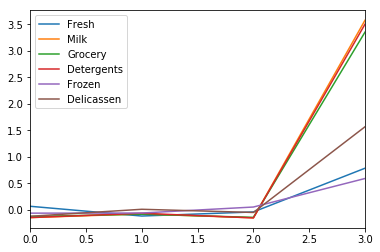

In [0]:
zscore_transpose_df.plot(kind='line')
plt.show()

### Clustering on correlated variables

In [0]:
#Fresh
X1 = np.array(scaled_data['Fresh']).reshape(-1, 1)
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

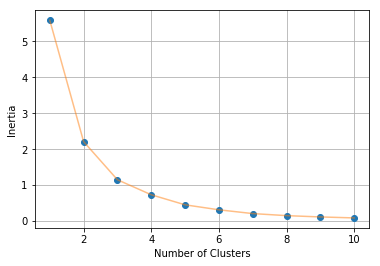

In [0]:
#plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [0]:
#Fresh 
#X1 = np.array(scaled_data[['Fresh','Grocery']])
X2 = np.array(scaled_data[['Fresh','Stationary']])
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

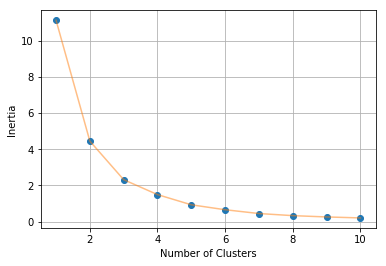

In [0]:
#plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.grid()
plt.show()

In [0]:
model = KMeans(n_clusters=4,random_state=7)
#model.fit(np.array(scaled_data['Fresh']).reshape(-1, 1))
model.fit(scaled_data[['Fresh','Stationary']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [0]:
clusters_data = customer_df.copy()
clusters_data.head()

In [0]:
clusters_data['clusters']=model.predict(scaled_data[['Fresh','Stationary']])

In [0]:
clusters_data['clusters'].value_counts()

## Data Transformation

In [0]:
customer_copy.head()

In [0]:
customer_copy[['Milk','Grocery']].corr()
#customer_copy.plot.scatter('Milk','Grocery',s=10,c="red")
#plt.show()

,Milk,Grocery
Milk,1.000000,0.728335
Grocery,0.728335,1.000000


In [0]:
exp_data=np.sqrt(customer_copy[['Milk','Grocery']])

In [0]:
exp_data.corr()

,Milk,Grocery
Milk,1.000000,0.783826
Grocery,0.783826,1.000000


In [0]:
# Scale the data using the natural logarithm
log_data = np.log(customer_copy[['Fresh','Milk','Grocery','Frozen','Detergents','Delicassen','Clothing']])

In [0]:
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents,Delicassen,Clothing
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,12.239972
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,12.598179
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,11.962586
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,12.408593
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,11.698741


## Treatment of Outliers

In [0]:
sns.boxplot(log_data['Milk'])
plt.title("Boxplot of Milk")
plt.show()


In [0]:
IQR=np.percentile(log_data['Milk'],75) - np.percentile(log_data['Milk'],25)
Outlier_top=np.percentile(log_data['Milk'],75)+1.5*IQR
Outlier_bottom=np.percentile(log_data['Milk'],25)-1.5*IQR
#print(Outlier_top)


In [0]:
log_data['Milk']=np.where(log_data['Milk'] > Outlier_top,np.percentile(log_data['Milk'],50),log_data['Milk'])
log_data['Milk']=np.where(log_data['Milk'] < Outlier_bottom,np.percentile(log_data['Milk'],50),log_data['Milk'])

NameError: ignored

In [0]:
sns.boxplot(log_data['Milk'])
plt.show()